In [15]:
import pandas as pd
df_raw=pd.read_csv('AmesHousing.csv')
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
'Central Air', 'Total Bsmt SF', 'SalePrice']
df=df_raw[columns]
df.shape
df_raw.shape,df.shape
df.head()

,Overall Qual,Overall Cond,Gr Liv Area,Central Air,Total Bsmt SF,SalePrice
0,6,5,1656,Y,1080.0,215000
1,5,6,896,Y,882.0,105000
2,6,6,1329,Y,1329.0,172000
3,7,5,2110,Y,2110.0,244000
4,5,5,1629,Y,928.0,189900


In [16]:
#Mapping categorical(String) to numeric value
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

C:\Users\Kashan\AppData\Local\Temp\ipykernel_17440\3962173267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})


In [27]:
#Checking for null values
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Gr Liv Area      0
Central Air      0
Total Bsmt SF    1
SalePrice        0
dtype: int64

In [29]:
df=df.dropna()
df.isnull().sum()
df.shape

(2929, 6)

In [31]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 1.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 894.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/1

  You can safely remove it manually.


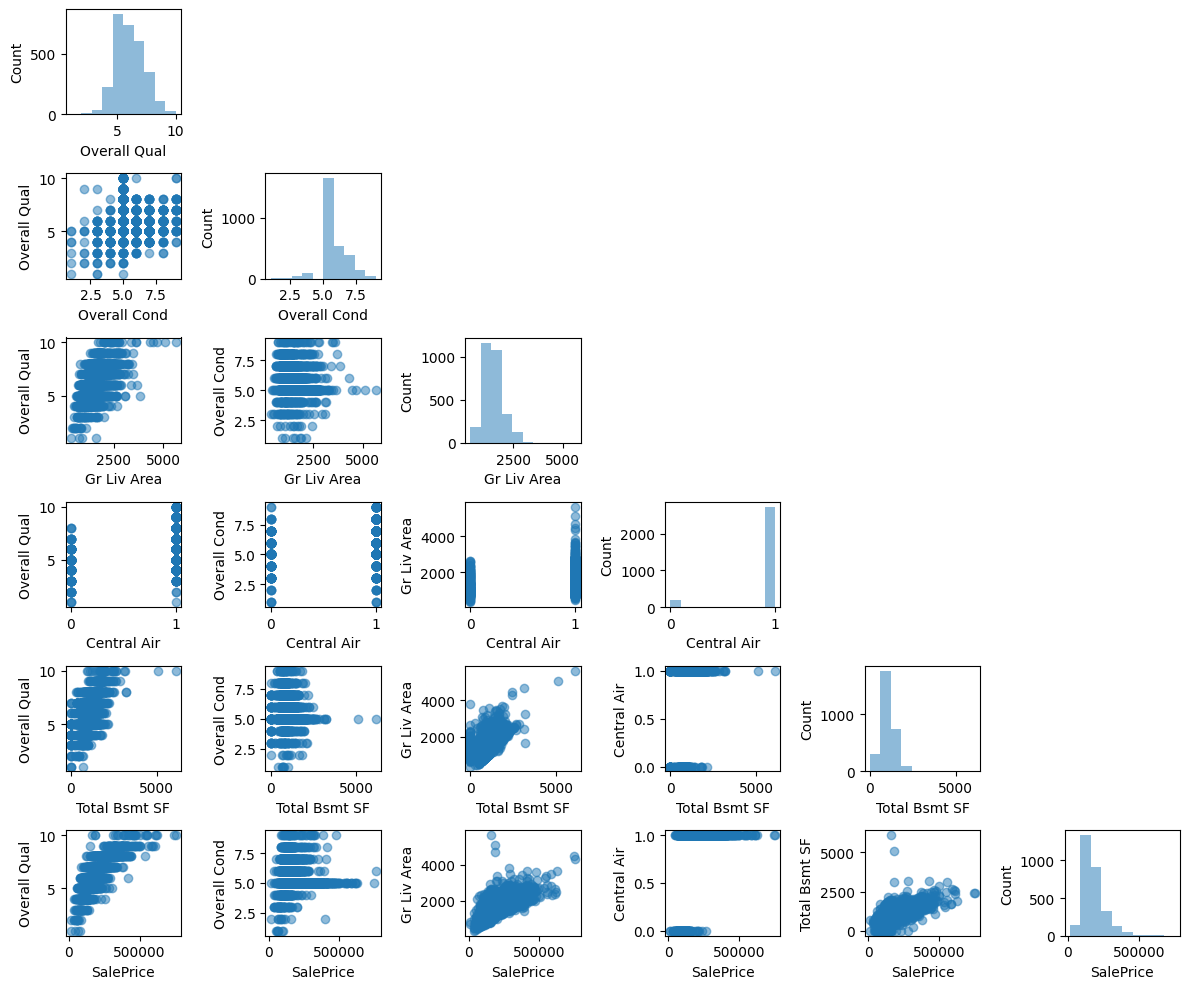

In [32]:
# visualizing dataset
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(12, 10),names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

In [33]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    def predict(self, X):
        return self.net_input(X)

In [36]:
import numpy as np

In [37]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

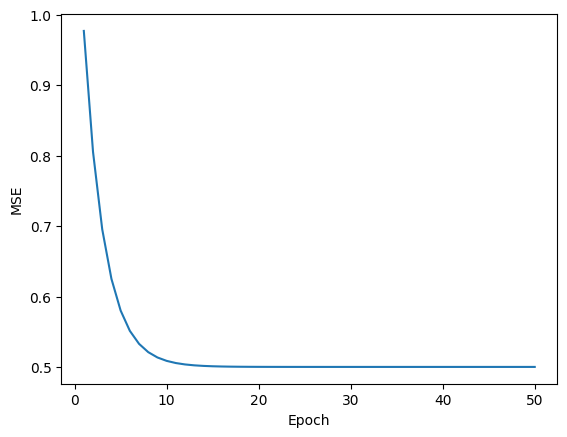

In [38]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

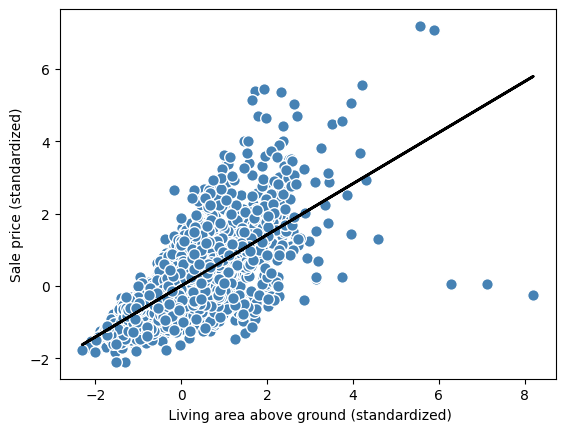

In [39]:
def lin_regplot(X, y, model):
 plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
 plt.plot(X, model.predict(X), color='black', lw=2)
lin_regplot(X_std, y_std, lr)
plt.xlabel(' Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()